In [2]:
import torch 
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import DataLoader, Dataset
import numpy as np
import pandas as pd


# Define the neural network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 3)
        self.fc2 = nn.Linear(3,1)
        
        
        # Activation function
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
        
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x
    
    
model = NeuralNetwork()
loss_function = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


        
data = pd.read_csv('../1Classes/data.csv')     

X = data[['age_in_years', 'income(1000$)']].values
Y_true = data['purchase'].values.reshape(-1, 1)   # .reshape -> numpy .view(-1, 1)


class CustomDataset(Dataset):
    def __init__(self, X, Y_true):
        self.X = X
        self.Y_true = Y_true

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return torch.tensor(self.X[index], dtype=torch.float32), torch.tensor(self.Y_true[index], dtype=torch.float32)


batch_size = 32
data = CustomDataset(X, Y_true)
dataloader = DataLoader(data, batch_size=batch_size, shuffle=True)


losses = []

num_epochs = 100

# model.train()

for epoch in range(num_epochs):
    for batch_x, batch_y in dataloader:
        y_pred = model(batch_x) #Forward pass
        
        loss = loss_function(y_pred, batch_y) # Calculate loss
        
        optimizer.zero_grad() # clear gradient
        loss.backward() # backward pass: compute gradient dl/dw
        optimizer.step() # weight update
        
        losses.append(loss.item())
        
    if epoch % 10 == 0:
        print(f"Epoch{epoch} loss = {loss.item()}")

Epoch0 loss = 19.961219787597656
Epoch10 loss = 1.0506309270858765
Epoch20 loss = 0.6803315281867981
Epoch30 loss = 0.5670008063316345
Epoch40 loss = 0.6980469822883606
Epoch50 loss = 0.6799126863479614
Epoch60 loss = 0.6775859594345093
Epoch70 loss = 0.6953631043434143
Epoch80 loss = 0.6060771942138672
Epoch90 loss = 0.64192134141922


In [3]:
# Testing the model
with torch.no_grad():
    test_input =torch.tensor([28, 4], dtype=torch.float32)
    test_output = model(test_input)
    
    print(f"Test output:{test_output}")

Test output:tensor([0.3840])


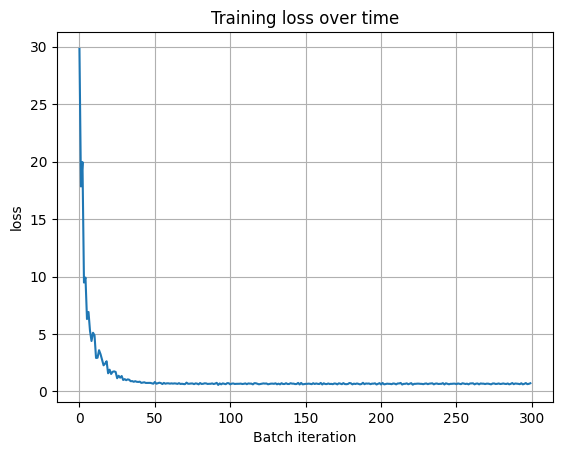

In [4]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.title("Training loss over time")
plt.xlabel("Batch iteration")
plt.ylabel("loss")
plt.grid(True)
plt.show()

In [5]:
import numpy as np
a = np.array([1,2,3,4,5,6])
a

array([1, 2, 3, 4, 5, 6])

In [6]:
a.reshape(2,3)


array([[1, 2, 3],
       [4, 5, 6]])

In [7]:
a.reshape(-1, 1)


array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [9]:
import pandas as pd
data = pd.read_csv('../1Classes/data.csv')      
data[['age_in_years', 'income(1000$)']]

,age_in_years,income(1000$)
0,51,8.75
1,54,7.62
2,36,11.09
3,61,14.27
4,40,9.36
...,...,...
86,32,7.94
87,26,6.81
88,58,11.89
89,49,6.88


In [10]:
data[['age_in_years', 'income(1000$)']].values


array([[51.  ,  8.75],
       [54.  ,  7.62],
       [36.  , 11.09],
       [61.  , 14.27],
       [40.  ,  9.36],
       [56.  ,  7.47],
       [63.  , 13.05],
       [25.  ,  7.14],
       [43.  ,  6.57],
       [45.  ,  9.92],
       [18.  , 14.55],
       [34.  ,  4.89],
       [60.  ,  6.29],
       [31.  , 10.26],
       [28.  , 12.79],
       [20.  ,  7.63],
       [35.  ,  1.66],
       [57.  ,  5.71],
       [64.  ,  2.83],
       [49.  , 14.14],
       [66.  ,  5.56],
       [29.  ,  3.55],
       [44.  ,  9.41],
       [30.  ,  6.12],
       [37.  , 12.99],
       [58.  ,  1.9 ],
       [62.  ,  5.26],
       [21.  , 13.14],
       [55.  , 14.88],
       [48.  , 11.97],
       [22.  ,  6.51],
       [27.  , 14.66],
       [32.  ,  9.92],
       [23.  ,  9.4 ],
       [38.  ,  2.84],
       [39.  ,  1.14],
       [50.  , 13.6 ],
       [59.  ,  4.58],
       [41.  ,  5.77],
       [26.  , 11.58],
       [33.  , 14.68],
       [42.  ,  1.36],
       [47.  ,  3.19],
       [53.